<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Linear Regression from Scratch (Gradient Descent)</h1>
Copyright Machine Learning Plus
</div>

### Import Packages

In [89]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

import random

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load the boston data

In [90]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = boston.target   

X.head()

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


__Description__

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.head(), '\n\n Y_Train: ', Y_train[:5])

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
88    0.05660   0.0   3.41   0.0  0.489  7.007  86.3  3.4217   2.0  270.0   
365   4.55587   0.0  18.10   0.0  0.718  3.561  87.9  1.6132  24.0  666.0   
242   0.10290  30.0   4.93   0.0  0.428  6.358  52.9  7.0355   6.0  300.0   
461   3.69311   0.0  18.10   0.0  0.713  6.376  88.4  2.5671  24.0  666.0   

     PTRATIO       B  LSTAT  
435     20.2  109.85  23.27  
88      17.8  396.90   5.50  
365     20.2  354.70   7.12  
242     16.6  372.75  11.22  
461     20.2  391.43  14.65   

 Y_Train:  [13.4 23.6 27.5 22.2 17.7]


__Standardize X__

In [92]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

### Define Functions

__Credits__: https://github.com/prateeksharma51/Multivariate-Linear-Regression-from-scratch-in-python/blob/master/Multivariate_Linear_Regression_from_Scratch.ipynb

__Error Function__

In [93]:
# Define the error function: MSE/2
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
    return error/(2*len(y_actual))

In [94]:
error_function(Y_train, Y_train)

0.0

__Predict__

In [95]:
# Define the prediction function
def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i] + (w[j]*x[i][j] + w[-1])
    return y_pred

In [96]:
# Define the gradient descent optimization function
def gradient(y_actual,y_pred,x):
    # init betas (random)
    grad = np.zeros(x.shape[1])
    # update betas
    for j in range(0,len(y_actual)): # rows
        for i in range(x.shape[1]):  # columns
            grad[i] = grad[i] - ((y_actual[j] - y_pred[j])*x[j][i])
    return grad/len(y_actual)

In [97]:
X_test_standardized.shape

(167, 13)

In [104]:
# Define the update weights function
def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:, 0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w = np.append(w,1)
    print("Running GRADIENT")
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient(y_train,y_pred,new_x_train)
        #print(f' value of  w passed is- {w}')
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05  # Learning rate Decay 
    return w

In [105]:
# Define the regression test
def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    # new_x_test = np.ones((row,column))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

### Implement Linear Regression

In [106]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized, Y_train, num_iterations, learning_rate)
print("Final weights:", w)
Y_pred = regression_test(X_test_standardized, w)

print("Y_Pred: ", Y_pred[:10])
print("Error: ", error_function(Y_test, Y_pred))

Running GRADIENT
mean square error:  68.31750737463128 after 0 th iteration
mean square error:  30.518402408282288 after 1 th iteration
mean square error:  20.5986078862077 after 2 th iteration
mean square error:  17.550516839195655 after 3 th iteration
mean square error:  16.133498278997212 after 4 th iteration
mean square error:  15.178692425541541 after 5 th iteration
mean square error:  14.446874889485743 after 6 th iteration
mean square error:  13.86748066769834 after 7 th iteration
mean square error:  13.402092142549666 after 8 th iteration
mean square error:  13.02404329945748 after 9 th iteration
mean square error:  12.713816420316938 after 10 th iteration
mean square error:  12.456843008649058 after 11 th iteration
mean square error:  12.242105330624726 after 12 th iteration
mean square error:  12.061179781226553 after 13 th iteration
mean square error:  11.907562535766704 after 14 th iteration
mean square error:  11.776185824301672 after 15 th iteration
mean square error:  11

mean square error:  10.641021042470937 after 173 th iteration
mean square error:  10.641011027480372 after 174 th iteration
mean square error:  10.641001489644356 after 175 th iteration
mean square error:  10.640992406217974 after 176 th iteration
mean square error:  10.640983755541557 after 177 th iteration
mean square error:  10.640975516988824 after 178 th iteration
mean square error:  10.640967670917462 after 179 th iteration
mean square error:  10.640960198622153 after 180 th iteration
mean square error:  10.640953082289728 after 181 th iteration
mean square error:  10.640946304956644 after 182 th iteration
mean square error:  10.640939850468305 after 183 th iteration
mean square error:  10.64093370344051 after 184 th iteration
mean square error:  10.640927849222605 after 185 th iteration
mean square error:  10.64092227386249 after 186 th iteration
mean square error:  10.640916964073282 after 187 th iteration
mean square error:  10.640911907201518 after 188 th iteration
mean squar

The error on training data was 10.64, whereas on test data it stands at $15.46$.

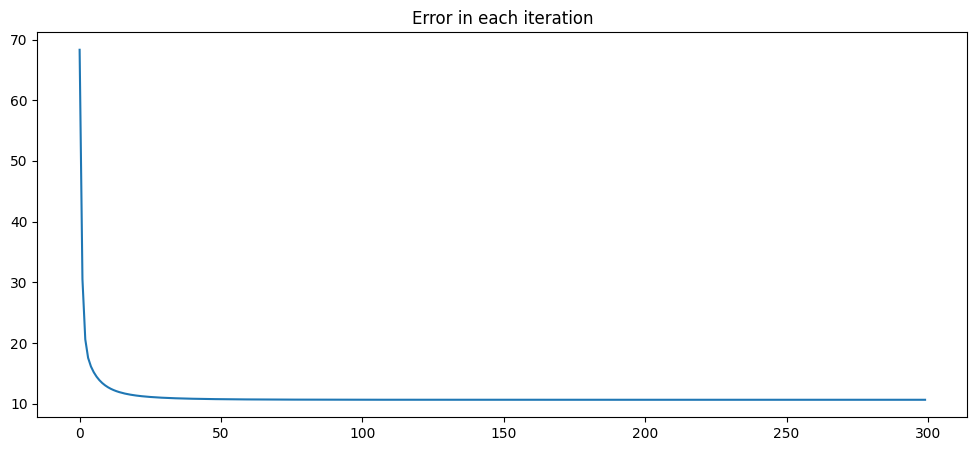

In [107]:
# Plot errors in each iteration
plt.figure(figsize=(12,5))
plt.plot(MSE_points)
plt.title("Error in each iteration")
plt.show()

__Predicted vs Actuals__

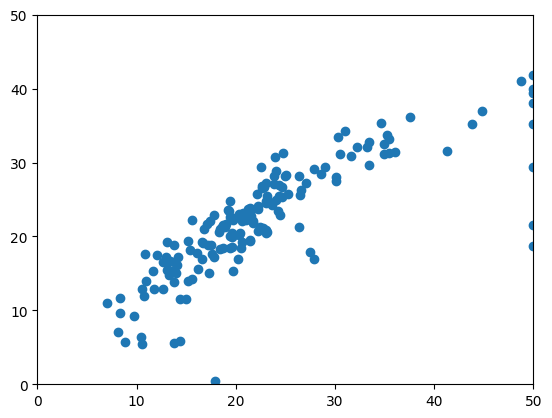

In [108]:
# Predicted vs Actuals
plt.scatter(Y_test, Y_pred)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

### Implementing in scikit-learn

The values of the coefficients won't match with what we got, because, sklearn uses a [different solver](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn) ([scipy based OLS solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)).

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [110]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_standardized, Y_train)

LinearRegression()

In [115]:
model.coef_

array([-1.31386961,  0.86315147, -0.16744001,  0.18985867, -1.48878331,
        2.79544176, -0.32786096, -2.77613856,  2.98007413, -2.27611448,
       -2.13691281,  1.0599945 , -3.3398838 ])

In [116]:
model.intercept_


22.53716814159296

In [117]:
X_train_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,0.910493,-0.501677,1.070722,-0.256599,1.631137,0.485317,0.961353,-0.822262,1.652890,1.549809,0.806886,-2.838763,1.520954
88,-0.411120,-0.501677,-1.128127,-0.256599,-0.551636,1.026561,0.667632,-0.183003,-0.870085,-0.801519,-0.303725,0.426805,-0.993771
365,0.124399,-0.501677,1.070722,-0.256599,1.439818,-3.907638,0.724253,-1.074367,1.652890,1.549809,0.806886,-0.053275,-0.764516
242,-0.405609,0.838149,-0.900608,-0.256599,-1.082110,0.097282,-0.514326,1.598147,-0.411362,-0.623388,-0.859031,0.152068,-0.184304
461,0.021710,-0.501677,1.070722,-0.256599,1.396337,0.123056,0.741947,-0.604214,1.652890,1.549809,0.806886,0.364577,0.301093


__Predict and check error on test dataset__

In [118]:
Y_pred2 = model.predict(X_test_standardized).round(2)
Y_pred2[:10]

array([37.47, 31.39, 27.12,  6.47, 33.63,  5.67, 27.04, 29.93, 26.36,
       22.45])

In [119]:
mean_squared_error(Y_pred2, Y_test)/2

14.265981137724552

__Check error on training dataset__

In [ ]:
Y_trainpred = model.predict(X_train_standardized).round(2)
mean_squared_error(Y_trainpred, Y_train)/2

9.773247345132743

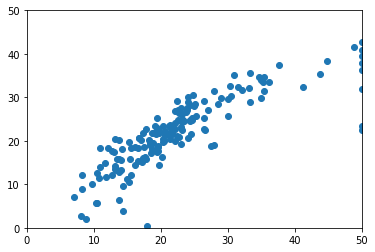

In [ ]:
# Predicted vs Actuals
plt.scatter(Y_test, Y_pred2)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()